# 과적합과 일반화
- **Generalize(일반화)**
    - 모델이 새로운 데이터셋에 대하여 정확히 예측하면 일반화 되었다고 한다
        - 모집단 전체에 대한 데이터의 일반적인 특성을 잘 찾은 모델의 상태를 일반화라고 한다
    - 모델이 훈련 데이터로 평가한 결과와 테스트 데이터로 평가한 결과의 차이가 거의 없고 좋은 평가지표를 보여준다

- **Overfitting(과대적합)**
    - 모델이 훈련 데이터에 대한 예측성능은 너무 좋지만 일반성이 떨어져 새로운 데이터에 대해선 성능이 좋지 않은 것을 Overfitting이라 한다.
    - 모델이 훈련 데이터 세트의 특징에 너무 맞춰 학습되어 일반적으로 나타나지 않을 특징까지 학습해 새로운 데이터셋에 대한 예측 성능이 떨어진다

- **Underfitting(과소적합)**
    - 모델이 훈련 데이터와 테스트 데이터셋 모두에서 성능이 안좋은 것
    - 모델이 너무 간단해 훈련 데이터에 대해 충분히 학습하지 못해 데이터셋의 패턴들을 다 찾지 못해 발생

![image](https://velog.velcdn.com/images/ppippi/post/a79fad17-6d14-4fcd-b4ee-caa0d55a197b/image.png)

## Overfitting(과대적합)의 원인
- 학습 데이터 양에 비해 모델이 너무 복잡한 경우 발생
    - 데이터의 양을 늘린다
        - 시간과 돈이 들기 때문에 현실적으로 어렵다
    - 모델을 좀 더 단순하게 만든다
        - 사용한 모델보다 좀 더 단순한 모델을 사용한다
        - 모든 모델은 모델의 복잡도를 변경할 수 있는 **규제와 관련된 하이퍼파라미터**를 제공하는데 이것을 조절한다

## Underfitting(과소적합)의 원인
- 데이터양에 비해 모델이 너무 단순한 경우 발생
    - 좀 더 복잡한 모델을 사용한다
    - 모델이 제공하는 규제 하이퍼파라미터를 조절한다

> - 복잡한 모델, 단순한 모델
>   - 이상치 같은 목잡한 값들에 반응하는(패턴을 찾는) 모델
>   - 이상치에 약한 모델

## 규제 하이퍼파라미터란?
- 모델의 복잡도를 규제하는 하이퍼파라미터로 Overfitting이나 Underfitting인 경우 이값을 조정하여 모델이 일반화 되도록 도와준다
- 이 규제 하이퍼파라밈터들은 모든 머신러닝 모델마다 있다

> #### 하이퍼파라미터란
> - **하이퍼파라미터(Hyper Parameter)**
>   - 모델의 성능에 영향을 끼치는 파라미터 값으로 모델 생성시 사람이 직접 지정하는 값
> - **하이퍼파라미터 튜닝(Hyper Parameter Tunning)**
>   - 모델의 성능을 가장 높일 수 있는 하이퍼파라미터를 찾는 작업
> - **파라미터(Parameter)**
>   - 머신러닝에서 파라미터는 모델이 데이터 학습을 통해 직접 찾아야 하는 값을 말한다

### 위스콘신 유방암 데이터셋 모델링
#### 데이터 로딩 및 train/test set 분리

In [255]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)

#### 모델 생성, 학습, 추론
- DecisionTreeClassifier

In [256]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def tree_modeling(X, y, max_depth = None):
    tree = DecisionTreeClassifier(max_depth = max_depth, random_state = 0)
    tree.fit(X, y)
    
    return tree

def tree_accuracy(X, y, model, title):
    print(title, accuracy_score(y, model.predict(X)))

In [257]:
print("max_depth = 1")
tree = tree_modeling(X_train, y_train, 1)
tree_accuracy(X_train, y_train, tree, 'train set')
tree_accuracy(X_test, y_test, tree, 'test_set')

max_depth = 1
train set 0.9295774647887324
test_set 0.8881118881118881


In [258]:
print("max_depth = 2")
tree2 = tree_modeling(X_train, y_train, 2)
tree_accuracy(X_train, y_train, tree2, 'train set')
tree_accuracy(X_test, y_test, tree2, 'test set')

max_depth = 2
train set 0.931924882629108
test set 0.8881118881118881


In [259]:
print("max_depth = 3")
tree3 = tree_modeling(X_train, y_train, 3)
tree_accuracy(X_train, y_train, tree3, 'train set')
tree_accuracy(X_test, y_test, tree3, 'test set')

max_depth = 3
train set 0.9765258215962441
test set 0.916083916083916


In [260]:
print("max_depth = 5")
tree5 = tree_modeling(X_train, y_train, 5)
tree_accuracy(X_train, y_train, tree5, 'train set')
tree_accuracy(X_test, y_test, tree5, 'test set')

max_depth = 5
train set 1.0
test set 0.9020979020979021


#### 트리 구조 시각화 - graphviz 이용

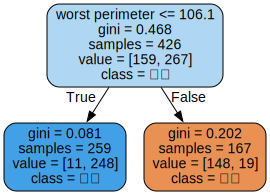

In [261]:
from sklearn.tree import export_graphviz
from graphviz import Source

graph = Source(export_graphviz(tree,
                               feature_names = data.feature_names,
                               class_names = ['악성', '양성'],
                               rounded = True,
                               filled = True # 함수 클래스를 색으로 확인 할 수 있도록 색을 채움
                               ))

graph

In [262]:
"""# 현재 노드를 분리하기 위한 질문
worst perimeter <= 106.1
---------------------------
# 현재 노드의 상태
gini = 0.468          # 지니계수 - 불순도. 0(불순도가 가장 낮다) ~ 0.5(불순도가 가장 높다)
samples = 426         # 데이터 개수
value = [159, 267]    # 클래스별 데이터 개수
class = 양성          # 다수 클래스의 클래스 이름
"""

'# 현재 노드를 분리하기 위한 질문\nworst perimeter <= 106.1\n---------------------------\n# 현재 노드의 상태\ngini = 0.468          # 지니계수 - 불순도. 0(불순도가 가장 낮다) ~ 0.5(불순도가 가장 높다)\nsamples = 426         # 데이터 개수\nvalue = [159, 267]    # 클래스별 데이터 개수\nclass = 양성          # 다수 클래스의 클래스 이름\n'

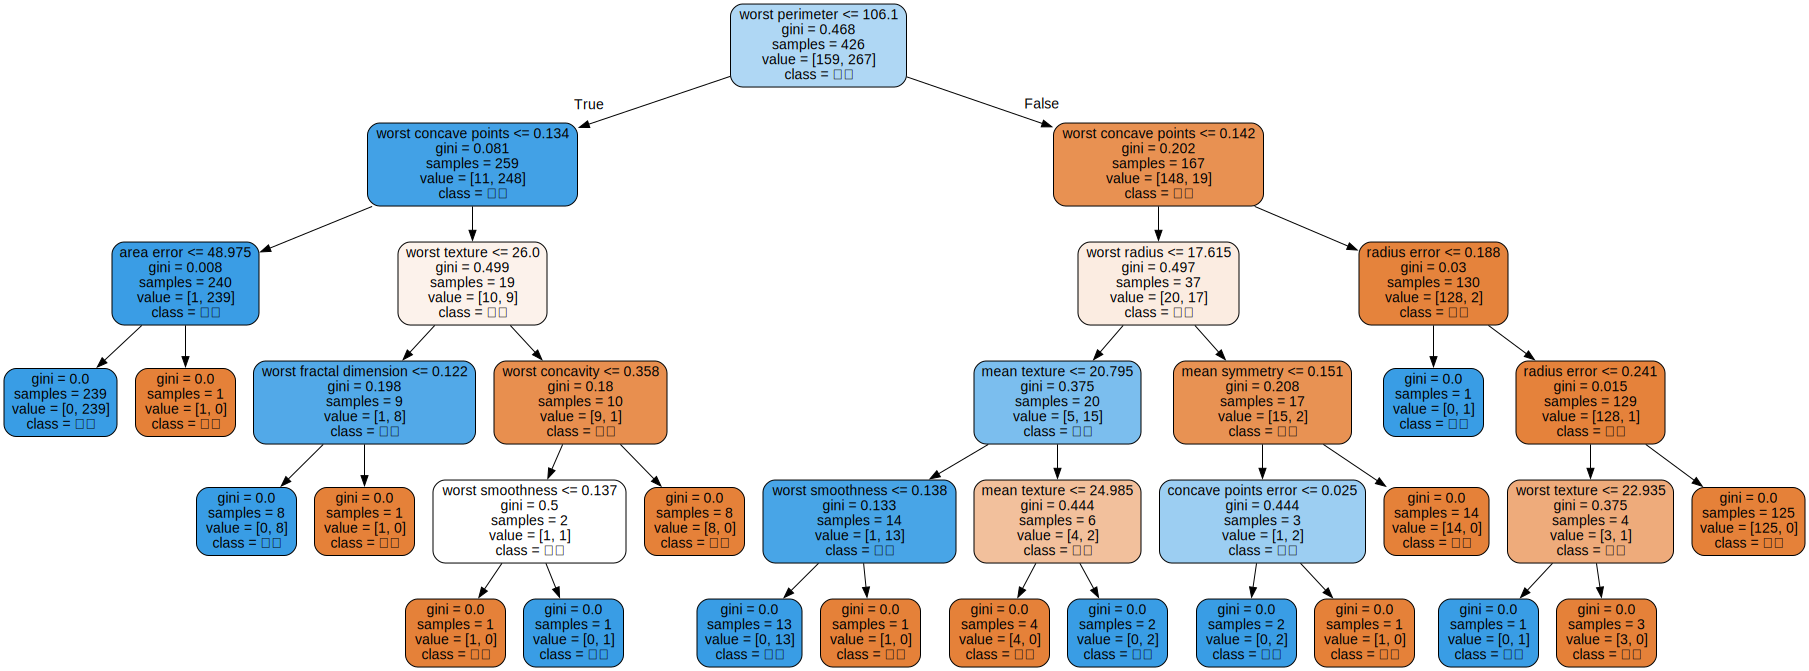

In [263]:
graph = Source(export_graphviz(tree5,
                               feature_names = data.feature_names,
                               class_names = ['악성', '양성'],
                               rounded = True, 
                               filled = True
                               ))
graph

In [264]:
import numpy as np

a = np.array([11, 248])
a / a.sum()

array([0.04247104, 0.95752896])

## DecisionTree 복잡도 제어(규제 파라미터)
- DecisionTree 모델을 복잡하게 하는 것은 노드가 너무 많이 만들어 지는 것이다
    - 노드가 많이 만들어 질수록 훈련 데이터셋에 Overfitting 된다
- 적절한 시점에 트리 생성을 중단해야 한다

- 모델의 복잡도 관련 주요 하이퍼파라미터
    - **max_depth** : 트리의 최대 깊이
    - **max_leaf_nodes** : 리프노드 개수
    - **min_samples_leaf** : 리프노드가 되기 위한 최소 샘플 수

## 최적의 하이퍼파라미터 찾기
### 최적의 max_depth 찾기

In [265]:
max_depth_candidate = [1, 2, 3, 4, 5, None]
train_acc_list = []
test_acc_list = []

for depth in max_depth_candidate:
    tree = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    tree.fit(X_train, y_train)
    
    train_pred = tree.predict(X_train)
    test_pred = tree.predict(X_test)
    
    train_acc_list.append(accuracy_score(y_train, train_pred))
    test_acc_list.append(accuracy_score(y_test, test_pred))

### 결과 확인

In [266]:
import pandas as pd

result_df = pd.DataFrame({
    'max_depth' : max_depth_candidate, 
    'train' : train_acc_list, 
    'test' : test_acc_list
})

result_df

,max_depth,train,test
0,1.0,0.929577,0.888112
1,2.0,0.931925,0.888112
2,3.0,0.976526,0.916084
3,4.0,0.985915,0.909091
4,5.0,1.000000,0.902098
5,NaN,1.000000,0.902098


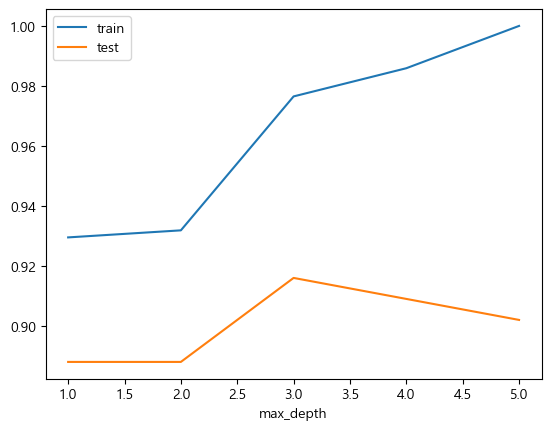

In [267]:
import matplotlib.pyplot as plt
result_df.set_index('max_depth').plot()
plt.show()

# Grid Search를 이용한 하이퍼파라미터 튜닝
- 모델의 성능을 가장 높게 하는 최적의 하이퍼파라미터를 찾는 방법
- 하이퍼파라미터 후보들을 하나씩 입력해 모델의 성능이 가장 좋게 만다는 값을 찾는다

## 종류
1. **Grid Search 방식**
    - sklearn.model_selection.**GridSearchCV**
        - 시도해볼 하이퍼파라미터들을 지정하면 모든 조합에 대해 교차검증 후 제일 좋은 성능을 내는 하이퍼파라미터 조합을 찾는다
        - 적은 수의 조합의 경우는 괜찮지만 시도할 하이퍼파라미터와 값들이 많아지면 너무 많은 시간이 걸린다

2. **Random Search 방식**
    - sklearn.model_selection.RandomizedSearchCV
        - GridSearch와 동일한 방식으로 사용
        - 모든 조합을 다 시도하지 않고 임의로 몇개의 조합만 테스트

### GridSearchCV 매개변수 및 결과조회
- **Initializer 매개변수**
    - **estimator**: 모델객체 지정
    - **params**: 하이퍼파라미터 목록을 dictionary로 전달 '파라미터명':[파라미터 list] 형식
    - **scoring**: 평가 지표
        - 생략시 분류는 **accuracy**, 회귀는 **$R^2$**를 기본 평가 지표로 설정
        - 여러개일 경우 List로 묶어서 지정
    - **refit**: best parameter를 정할 때 사용할 평가지표
        - scoring에 여러개의 평가지표를 설정한 경우 refit을 반드시 설정
    - **cv**: 교차검증시 fold 개수
    - **n_jobs**: 사용할 CPU 코어 개수 (None: 1(기본값), -1: 모든 코어 다 사용)

- **메소드**
    - **fit(X, y)**: 학습
    - **predict(X)**: 분류-추론한 class. 회귀-추론한 값
        - 제일 좋은 성능을 낸 모델로 predict()
    - **predict_proba(X)**: 분류문제에서 class별 확률을 반환
        - 제일 좋은 성능을 낸 모델로 predict_proba() 호출

- **결과 조회 속성**
    - fit() 후에 호출 가능
    - **cv_results_**: 파라미터 조합별 평가 결과를 Dictionary로 반환
    - **best_params_**: 가장 좋은 성능을 낸 parameter 조합을 반환
    - **best_estimator_**: 가장 좋은 성능을 낸 모델을 반환
    - **best_score_**: 가장 좋은 점수 반환

### breast cancer 데이터 셋 활용

#### GridSearchCV 생성

In [268]:
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(random_state = 0)

params = {
    'max_depth' : [1, 2, 3, 4, 5],
    'max_leaf_nodes' : [3, 5, 7, 9]
}

gs = GridSearchCV(tree,
                  params,
                  scoring = 'accuracy',
                  cv = 4, 
                  n_jobs = -1
                  )

#### 학습

In [269]:
gs.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_leaf_nodes': [3, 5, 7, 9]},
             scoring='accuracy')

#### 결과 확인

In [270]:
print('best param:', gs.best_params_)
print('best score:', gs.best_score_)

best param: {'max_depth': 2, 'max_leaf_nodes': 5}
best score: 0.9248809733733028


In [271]:
gs.best_estimator_

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=5, random_state=0)

In [272]:
result = pd.DataFrame(gs.cv_results_)
result.sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
5,0.004747,0.000828,0.001000,7.420718e-07,2,5,"{'max_depth': 2, 'max_leaf_nodes': 5}",0.897196,0.953271,0.905660,0.943396,0.924881,0.023899,1
6,0.006496,0.003198,0.000751,4.333601e-04,2,7,"{'max_depth': 2, 'max_leaf_nodes': 7}",0.897196,0.953271,0.905660,0.943396,0.924881,0.023899,1
7,0.005496,0.000499,0.000751,4.333259e-04,2,9,"{'max_depth': 2, 'max_leaf_nodes': 9}",0.897196,0.953271,0.905660,0.943396,0.924881,0.023899,1
17,0.007994,0.001225,0.001250,2.164907e-03,5,5,"{'max_depth': 5, 'max_leaf_nodes': 5}",0.906542,0.925234,0.915094,0.943396,0.922567,0.013726,4
13,0.007244,0.001088,0.000250,4.322586e-04,4,5,"{'max_depth': 4, 'max_leaf_nodes': 5}",0.906542,0.925234,0.915094,0.943396,0.922567,0.013726,4


#### best model을 이용해 Test set 최종평가

In [273]:
gs.best_score_

0.9248809733733028

In [274]:
best_model = gs.best_estimator_
accuracy_score(y_test, best_model.predict(X_test))

0.8881118881118881

In [275]:
accuracy_score(y_test, gs.predict(X_test))

0.8881118881118881

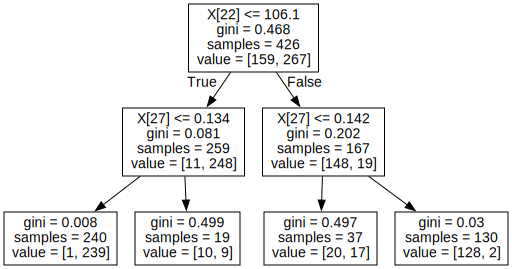

In [276]:
g = Source(export_graphviz(best_model))
g

#### 여러 성능지표를 확인
- 여러 성능지표를 확인할 수 있지만 최적의 파라미터를 찾기 위해서는 하나의 지표만 사용한다.
    - scoring에 리스트로 평가지표들 묶어서 설정
    - refit에 최적의 파라미터 찾기 위한 평가지표 설정

#### GridSearchCV 생성

In [277]:
gs2 = GridSearchCV(tree,
                   params, 
                   scoring = ['accuracy', 'f1'],
                   refit = 'accuracy', # 어떤 평가지표로 순위를 정할지
                   cv = 4,
                   n_jobs = -1
                   )

#### 학습

In [278]:
gs2.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_leaf_nodes': [3, 5, 7, 9]},
             refit='accuracy', scoring=['accuracy', 'f1'])

#### 결과 확인

In [279]:
print('best_prams: ', gs2.best_params_)
print('best_score: ', gs2.best_score_)

best_prams:  {'max_depth': 2, 'max_leaf_nodes': 5}
best_score:  0.9248809733733028


In [280]:
result2 = pd.DataFrame(gs2.cv_results_)
result2.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_leaf_nodes', 'params',
       'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy',
       'split3_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy',
       'rank_test_accuracy', 'split0_test_f1', 'split1_test_f1',
       'split2_test_f1', 'split3_test_f1', 'mean_test_f1', 'std_test_f1',
       'rank_test_f1'],
      dtype='object')

In [281]:
result2.sort_values('rank_test_accuracy').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,mean_test_f1,std_test_f1,rank_test_f1
5,0.012243,0.007079,0.003747,0.000828,2,5,"{'max_depth': 2, 'max_leaf_nodes': 5}",0.897196,0.953271,0.905660,...,0.924881,0.023899,1,0.913386,0.963504,0.924242,0.955224,0.939089,0.020842,1
6,0.005246,0.001089,0.003999,0.000707,2,7,"{'max_depth': 2, 'max_leaf_nodes': 7}",0.897196,0.953271,0.905660,...,0.924881,0.023899,1,0.913386,0.963504,0.924242,0.955224,0.939089,0.020842,1
7,0.005496,0.000500,0.003498,0.001499,2,9,"{'max_depth': 2, 'max_leaf_nodes': 9}",0.897196,0.953271,0.905660,...,0.924881,0.023899,1,0.913386,0.963504,0.924242,0.955224,0.939089,0.020842,1
17,0.010494,0.007293,0.007746,0.004491,5,5,"{'max_depth': 5, 'max_leaf_nodes': 5}",0.906542,0.925234,0.915094,...,0.922567,0.013726,4,0.923077,0.942857,0.931298,0.954545,0.937944,0.011884,4
13,0.008995,0.003238,0.006247,0.002861,4,5,"{'max_depth': 4, 'max_leaf_nodes': 5}",0.906542,0.925234,0.915094,...,0.922567,0.013726,4,0.923077,0.942857,0.931298,0.954545,0.937944,0.011884,4


In [282]:
result2.sort_values('rank_test_f1').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,mean_test_f1,std_test_f1,rank_test_f1
5,0.012243,0.007079,0.003747,0.000828,2,5,"{'max_depth': 2, 'max_leaf_nodes': 5}",0.897196,0.953271,0.905660,...,0.924881,0.023899,1,0.913386,0.963504,0.924242,0.955224,0.939089,0.020842,1
6,0.005246,0.001089,0.003999,0.000707,2,7,"{'max_depth': 2, 'max_leaf_nodes': 7}",0.897196,0.953271,0.905660,...,0.924881,0.023899,1,0.913386,0.963504,0.924242,0.955224,0.939089,0.020842,1
7,0.005496,0.000500,0.003498,0.001499,2,9,"{'max_depth': 2, 'max_leaf_nodes': 9}",0.897196,0.953271,0.905660,...,0.924881,0.023899,1,0.913386,0.963504,0.924242,0.955224,0.939089,0.020842,1
17,0.010494,0.007293,0.007746,0.004491,5,5,"{'max_depth': 5, 'max_leaf_nodes': 5}",0.906542,0.925234,0.915094,...,0.922567,0.013726,4,0.923077,0.942857,0.931298,0.954545,0.937944,0.011884,4
13,0.008995,0.003238,0.006247,0.002861,4,5,"{'max_depth': 4, 'max_leaf_nodes': 5}",0.906542,0.925234,0.915094,...,0.922567,0.013726,4,0.923077,0.942857,0.931298,0.954545,0.937944,0.011884,4


#### best model을 이용해 Test set 최종 평가

In [283]:
accuracy_score(y_test, gs.predict(X_test))

0.8881118881118881

## RandomizedSearchCV 
- **Initializer 매개변수**
    - **estimator**: 모델 객체 생성
    - **param_distributions**: 하이퍼파라미터 목록을 dictionary로 전달 '파라미터명':[파라미터값 list] 형식
    - **n_iter** : 전체 조합중 몇개의 조합을 테스트 할지 개수 설정
    - **scoring**: 평가 지표
    - **refit**: best parameter를 정할 때 사용할 평가지표. Scoring에 여러개의 평가지표를 설정한 경우 설정
    - **cv**: 교차검증시 fold 개수
    - **n_jobs**: 사용할 CPU 코어 개수 (None: 1(기본값), -1: 모든 코어 다 사용)

- **메소드**
    - **fit(X, y)**: 학습
    - **predict(X)**: 분류-추론한 class. 회귀-추론한 값
        - 제일 좋은 성능을 낸 모델로 predict()
    - **predict_proba(X)**: 분류문제에서 class별 확률을 반환
        - 제일 좋은 성능을 낸 모델로 predict_proba() 호출

- **결과 조회 속성**
    - fit()후에 호출 가능
    - **cv_results_**: 파라미터 조합별 평가 결과를 Dictionary로 반환
    - **best_params_**: 가장 좋은 성능을 낸 parameter 조합을 반환
    - **best_estimator_**: 가장 좋은 성능을 낸 모델을 반환
    - **best_score_**: 가장 좋은 점수 반환

### RandomizedSearchCV 생성

In [284]:
from sklearn.model_selection import RandomizedSearchCV

params2 = {
    'max_depth' : range(1, 6),
    'max_leaf_nodes' : range(3, 31, 3),
    'max_features' : [0.1, 0.5, 1.0]
}
print('하이퍼파라미터 총 조합수: ', (5*10*3))

rs = RandomizedSearchCV(DecisionTreeClassifier(random_state=0),
                        params2,
                        n_iter = 5, 
                        scoring = 'accuracy',
                        cv = 4,
                        n_jobs = -1
                        )
rs.fit(X_train, y_train)

하이퍼파라미터 총 조합수:  150


RandomizedSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': range(1, 6),
                                        'max_features': [0.1, 0.5, 1.0],
                                        'max_leaf_nodes': range(3, 31, 3)},
                   scoring='accuracy')

In [285]:
result3 = pd.DataFrame(rs.cv_results_)
print(result3.shape)
result3

(5, 15)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_leaf_nodes,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006997,0.001869,0.000999,0.000001,18,0.5,3,"{'max_leaf_nodes': 18, 'max_features': 0.5, 'm...",0.915888,0.943925,0.933962,0.971698,0.941368,0.020190,3
1,0.004497,0.001117,0.001499,0.000866,6,0.5,3,"{'max_leaf_nodes': 6, 'max_features': 0.5, 'ma...",0.925234,0.943925,0.933962,0.971698,0.943705,0.017463,2
2,0.005496,0.001119,0.000500,0.000500,24,0.5,4,"{'max_leaf_nodes': 24, 'max_features': 0.5, 'm...",0.925234,0.962617,0.924528,0.971698,0.946019,0.021382,1
3,0.008495,0.001499,0.000750,0.000433,9,1.0,5,"{'max_leaf_nodes': 9, 'max_features': 1.0, 'ma...",0.915888,0.915888,0.896226,0.952830,0.920208,0.020473,5
4,0.003998,0.001224,0.000999,0.000707,12,0.5,2,"{'max_leaf_nodes': 12, 'max_features': 0.5, 'm...",0.897196,0.953271,0.943396,0.952830,0.936673,0.023131,4


In [286]:
print('best_score:', rs.best_score_)
print('best_params:', rs.best_params_)

best_score: 0.9460192205960148
best_params: {'max_leaf_nodes': 24, 'max_features': 0.5, 'max_depth': 4}


### best model을 이용해 Test set 최종평가

In [287]:
best_model2 = rs.best_estimator_
accuracy_score(y_test, best_model2.predict(X_test))

0.9440559440559441

In [288]:
accuracy_score(y_test, rs.predict(X_test))

0.9440559440559441

# 파이프라인(Pipeline)
- 개요
    - 여러 단계의 머신러닝 프로세스 (전처리의 각 단계, 모델생성, 학습)처리 과정을 설정하여 한번에 처리
- 파이프라인은 여러개의 변환기와 마지막에 변화기 또는 추정기를 추가 가능(추정기 - Estimator는 마지막에만 올 수 있다)
- 전처리 작업 파이프라인
    - 변환기들로만 구성
- 전체 프로세스 파이프 라인
    - 마지막에 추정기 추가

## Pipeline 생성
- (이름, 변환기)를 리스트로 묶어서 전달
- 마지막에 추정기가 올 수 있다

## Pipeline을 이용한 학습
- pipeline.fit()
    - 각 순서대로 각 변환기의 fit_transform()이 실행되고 결과가 다음 단계로 전달. 마지막 단계에서는 fit()만 호출
    - 마지막이 추정기일때 사용
- pipeline.fit_transform()
    - fit()과 동일하나 마지막 단계에서도 fit_transform()이 실행
    - 전처리 작업 파이프라인(모든 단계가 변화기)일 때 사용
- 마지막이 추정기(모델)일 경우
    - predict(X), predict_proba(X)
    - 추정기를 이용해서 X에 대한 결과를 추론
    - 모델 앞에 있는 변환기들을 이용해서 transform() 그 처리 결과를 다음 단계로 전달

![image](https://velog.velcdn.com/images/ppippi/post/ddab5d73-10c7-4e14-ba22-c5f5803934c4/image.png)

### 데이터셋 로드, train/test set 분리

In [289]:
# breast cancer dataset => 모든 feature 연속형

# 1. Feature Scaling
# 2. SVM

### Pipeline 생성

In [290]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

steps = [
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state = 0))
]

pipeline = Pipeline(steps, verbose = True)
print(pipeline.steps)

[('scaler', StandardScaler()), ('svm', SVC(random_state=0))]


### 학습

In [291]:
pipeline.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svm, total=   0.0s


Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(random_state=0))],
         verbose=True)

### 추론 및 평가

In [292]:
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

accuracy_score(y_train, train_pred), accuracy_score(y_test, test_pred)

(0.9929577464788732, 0.958041958041958)

### 새로운 데이터에 대한 추론

In [293]:
new_data = X_test[:5]
pipeline.predict(new_data)

array([1, 0, 0, 1, 0])

In [294]:
y_test[:5]

array([1, 0, 0, 1, 0])

### pipeline을 파일로 저장(pickle)

In [295]:
import pickle

# 저장
with open('model/pipeline.pkl', 'wb') as fw:
    pickle.dump(pipeline, fw)

In [296]:
# 저장된 pipeline로딩
with open('model/pipeline.pkl', 'rb') as fr:
    saved_pl = pickle.load(fr)

In [297]:
type(saved_pl), saved_pl.steps

(sklearn.pipeline.Pipeline,
 [('scaler', StandardScaler()), ('svm', SVC(random_state=0))])

In [298]:
accuracy_score(y_test, saved_pl.predict(X_test))

0.958041958041958

## GridSearch에서 Pipeline 사용
- 하이퍼파라미터 지정시 파이프라인 `프로세스이름_하이퍼파라미터`형식으로 지정
1. Pipeline 생성
2. GridSearchCV의 estimator에 pipeline 등록

### Pipeline 생성

In [299]:
from sklearn.decomposition import PCA

steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('svm', SVC(random_state = 0))
]

pl = Pipeline(steps, verbose = True)

### GridSearchCV 생성

In [300]:
# SVC의 Hyper parameter -> C, gamma : float 0.0 ~
params = {
    'svm__C' : [0.01, 0.1, 0.5, 1],
    'svm__gamma' : [0.01, 0.1, 0.5, 1],
    'pca__n_components' : [30, 20, 15, 10, 5]
}

gs = GridSearchCV(pl,
                  params, 
                  scoring = 'accuracy',
                  cv = 4, 
                  n_jobs = -1
                  )

gs.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 3) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.0s
[Pipeline] ............... (step 3 of 3) Processing svm, total=   0.0s


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('svm', SVC(random_state=0))],
                                verbose=True),
             n_jobs=-1,
             param_grid={'pca__n_components': [30, 20, 15, 10, 5],
                         'svm__C': [0.01, 0.1, 0.5, 1],
                         'svm__gamma': [0.01, 0.1, 0.5, 1]},
             scoring='accuracy')

In [301]:
print('best_params:', gs.best_params_)
print('best_score:', gs.best_score_)

best_params: {'pca__n_components': 5, 'svm__C': 1, 'svm__gamma': 0.1}
best_score: 0.9765914300828777


In [302]:
best_model = gs.best_estimator_
type(best_model)

sklearn.pipeline.Pipeline

## make_pipeline() 함수를 이용한 파이프라인 생성을 편리하게 하기
- make_pipeline(변환기객체, 변환기객체, ..., 추정기객체): Pipeline
- 프로세스의 이름을 프로세스 클래스 이름(소문자로 변환)으로 해서 Pipeline을 생성

In [303]:
from sklearn.pipeline import make_pipeline
pipeline2 = make_pipeline(StandardScaler(), PCA(5), SVC(C=1, gamma = 0.1))
pipeline2.steps

[('standardscaler', StandardScaler()),
 ('pca', PCA(n_components=5)),
 ('svc', SVC(C=1, gamma=0.1))]

In [304]:
pipeline2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=5)), ('svc', SVC(C=1, gamma=0.1))])

In [305]:
accuracy_score(y_test, pipeline2.predict(X_test))

0.9440559440559441

# 사용자정의 Transformer(전처리 변환기) 구현

In [306]:
from sklearn.base import TransformerMixin

class MissingValueProcessor(TransformerMixin):
    """
    결측치를 처리하는 변환기(전처리기)
    문자열타입(object) - 최빈값으로 변환
    숫자타입(float) - 중위수(중앙값)으로 변환
    """
    def __init__(self):
        pass
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        """
        X : DataFrame
        """
        X = X.copy()
        
        for colname in X.columns:
            if X[colname].dtype == 'object':
                mode = X[colname].mode()[0]
                X[colname].fillna(mode, inplace = True)
            elif X[colname].dtype == 'float':
                median = X[colname].median()
                X[colname].fillna(median, inplace = True)
        return X

In [307]:
cols = ['age', 'workclass','fnlwgt','education', 'education-num', 'marital-status', 'occupation','relationship', 'race', 'gender','capital-gain','capital-loss', 'hours-per-week','native-country', 'income']
category_columns = ['workclass','education','marital-status', 'occupation','relationship','race','gender','native-country']
continuous_columns = ['age','fnlwgt', 'education-num','capital-gain','capital-loss','hours-per-week']
target = 'income'

In [308]:
import pandas as pd

df = pd.read_csv('data/adult.data', header = None, na_values = '?', skipinitialspace = True, names = cols)
df.shape

(32561, 15)

In [309]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [310]:
import numpy as np

df.loc[:10, 'age'] = np.nan

In [311]:
df.isnull().sum()

age                 11
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [312]:
df['age'].median()

37.0

In [313]:
df[['workclass', 'occupation', 'native-country']].mode()

,workclass,occupation,native-country
0,Private,Prof-specialty,United-States


In [314]:
# MissingValueProcessor를 이용해 Adult Dataset의 결측치 처리
mvp = MissingValueProcessor()
mvp.fit(df)
adult_df = mvp.transform(df)

In [315]:
adult_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [316]:
adult_df.loc[:10, 'age']

0     37.0
1     37.0
2     37.0
3     37.0
4     37.0
5     37.0
6     37.0
7     37.0
8     37.0
9     37.0
10    37.0
Name: age, dtype: float64

In [317]:
np.where(adult_df['workclass'] != df['workclass'])

(array([   27,    61,    69, ..., 32539, 32541, 32542], dtype=int64),)

In [318]:
adult_df.loc[[27, 61, 69, 32539], 'workclass']

27       Private
61       Private
69       Private
32539    Private
Name: workclass, dtype: object

In [319]:
# Adult 데이터셋의 범주형 컬럼들을 onehot encoding 처리.
# Adult 데이터셋의 연속형 컬럼들은 standard scaling 처리. 

In [320]:
from sklearn.model_selection import train_test_split

y = adult_df[target]
X = adult_df.drop(columns = target)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)

In [321]:
cols = ['age', 'workclass','fnlwgt','education', 'education-num', 'marital-status', 'occupation','relationship', 'race', 'gender','capital-gain','capital-loss', 'hours-per-week','native-country', 'income']
category_columns = ['workclass','education','marital-status', 'occupation','relationship','race','gender','native-country']
continuous_columns = ['age','fnlwgt', 'education-num','capital-gain','capital-loss','hours-per-week']
target = 'income'

In [322]:
from sklearn.preprocessing import OneHotEncoder

class AdultOneHotEncoder(TransformerMixin):
    def __init__(self, unique_values):
        self.category_colname = category_columns
        self.unique_values = unique_values
        
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        X = X.copy()
        cate_col = X[self.category_colname]
        cont_colname = list(set(X.columns) - set(self.category_colname))
        cont_col = X[cont_colname].values
        
        result_colname = []
        result = np.empty(shape=(X.shape[0], 0))
        
        for colname in self.category_colname:
            ohe = OneHotEncoder(sparse = False)
            ohe.fit(self.unique_values[colname].reshape(-1, 1))
            v = ohe.transform(X[colname].values.reshape(-1, 1))
            result = np.append(result, v, axis = 1)
            result_colname = result_colname + list(ohe.get_feature_names_out())
            
        values = np.concatenate([cont_col, result], axis = 1)
        return pd.DataFrame(values, columns = cont_colname + result_colname)
            

In [323]:
# 각 feature들의 class값들을 지정
unique_values = {}
for colname in category_columns:
    unique_values[colname] = X[colname].unique()

In [324]:
unique_values

{'workclass': array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
        'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
       dtype=object),
 'education': array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
        'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
        '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object),
 'marital-status': array(['Never-married', 'Married-civ-spouse', 'Divorced',
        'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
        'Widowed'], dtype=object),
 'occupation': array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
        'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
        'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
        'Tech-support', 'Protective-serv', 'Armed-Forces',
        'Priv-house-serv'], dtype=object),
 'relationship': array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
        'Oth

In [325]:
aohe = AdultOneHotEncoder(unique_values)
aohe.fit(X_train)
X_train_ohe = aohe.transform(X_train)
X_test_ohe = aohe.transform(X_test)

In [326]:
print(X_train_ohe.shape)
print(X_test_ohe.shape)

(24420, 105)
(8141, 105)


In [327]:
X_train_ohe.head(2)

,hours-per-week,capital-loss,fnlwgt,age,capital-gain,education-num,x0_Federal-gov,x0_Local-gov,x0_Never-worked,x0_Private,...,x0_Portugal,x0_Puerto-Rico,x0_Scotland,x0_South,x0_Taiwan,x0_Thailand,x0_Trinadad&Tobago,x0_United-States,x0_Vietnam,x0_Yugoslavia
0,45.0,0.0,193379.0,25.0,0.0,12.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,40.0,0.0,176904.0,55.0,0.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [328]:
# Adult 데이터셋의 연속형 컬럼들은 standard scaling 처리
from sklearn.preprocessing import StandardScaler

class AdultScaler(TransformerMixin):
    def __init__(self):
        self.cont_colname = continuous_columns
        self.scaler = StandardScaler()
        
    def fit (self, X, y = None):
        self.scaler.fit(X[self.cont_colname])
        return self
    
    def transform(self, X, y = None):
        X = X.copy()
        category_colname = list(X.columns.drop(self.cont_colname))
        v_cont = self.scaler.transform(X[self.cont_colname])
        v_cate = X[category_colname].values
        result = np.concatenate([v_cont, v_cate], axis = 1)
        return pd.DataFrame(result, columns = self.cont_colname + category_colname)

In [329]:
ascaler = AdultScaler()
ascaler.fit(X_train)
result = ascaler.transform(X_train)
result.shape

(24420, 14)

In [330]:
result['age'].mean(), result['age'].std()

(-9.150019899101516e-17, 1.000020475649336)

In [331]:
result2 = ascaler.transform(X_test)
result2['age'].mean(), result2['age'].std(), result2['education-num'].mean(), result2['education-num'].std()

(-0.005812989802295297,
 0.992989636710793,
 0.008297087923650706,
 0.9734987536075029)

In [332]:
from sklearn.svm import SVC

transformer_steps = [
    ('ohe', AdultOneHotEncoder(unique_values)),
    ('scaler', AdultScaler())
]

steps = transformer_steps + [('svm', SVC(random_state = 0))]

In [333]:
from sklearn.pipeline import Pipeline

trans_pipeline = Pipeline(transformer_steps)
trans_pipeline.fit(X_train, y_train)
X_result = trans_pipeline.transform(X_train)
X_result.shape

(24420, 105)

In [334]:
X_result.head(5)
X_result['age'].mean(), X_result['age'].std()

(-1.0103847870298722e-16, 1.0000204756494053)

In [335]:
pipeline = Pipeline(steps, verbose = True)
pipeline.fit(X_train, y_train)

[Pipeline] ............... (step 1 of 3) Processing ohe, total=   0.2s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   1.3s
[Pipeline] ............... (step 3 of 3) Processing svm, total=  50.4s


Pipeline(steps=[('ohe',
                 <__main__.AdultOneHotEncoder object at 0x000002423B4C8D00>),
                ('scaler', <__main__.AdultScaler object at 0x000002423B4C8310>),
                ('svm', SVC(random_state=0))],
         verbose=True)

In [336]:
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

In [337]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, train_pred), accuracy_score(y_test, test_pred)

(0.8679361179361179, 0.8507554354501904)